<a href="https://colab.research.google.com/github/Vengadore/Notebooks/blob/master/Data_analysis_EfficientDet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download EfficientDet


In [1]:
%%capture
#@title
import os
import sys
import tensorflow.compat.v1 as tf

# Download source code.
if "efficientdet" not in os.getcwd():
  !git clone --depth 1 https://github.com/google/automl
  os.chdir('automl/efficientdet')
  sys.path.append('.')
  !pip install -r requirements.txt
  !pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
else:
  !git pull

In [2]:
MODEL = 'efficientdet-d7'  #@param

def download(m):
  if m not in os.listdir():
    !wget https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco/{m}.tar.gz
    !tar zxf {m}.tar.gz
  ckpt_path = os.path.join(os.getcwd(), m)
  return ckpt_path

# Download checkpoint.
ckpt_path = download(MODEL)
print('Use model in {}'.format(ckpt_path))

--2020-09-29 07:47:01--  https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco/efficientdet-d7.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 66.102.1.128, 74.125.206.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 413468440 (394M) [application/x-tar]
Saving to: ‘efficientdet-d7.tar.gz’

efficientdet-d7.tar 100%[===================>] 394.31M  53.9MB/s    in 12s     

2020-09-29 07:47:14 (33.5 MB/s) - ‘efficientdet-d7.tar.gz’ saved [413468440/413468440]

Use model in /content/automl/efficientdet/efficientdet-d7


## Download dataset of PDR

In [3]:
# Download dataset
from IPython.display import clear_output
!wget "https://correoipn-my.sharepoint.com/:u:/g/personal/ccarrillog1400_alumno_ipn_mx/Efj-qLSMa2tPm6O9MUp6X0QBN5SDwHvMFh4Ni3dynVOzxg?download=1"
!sudo chmod 777 "Efj-qLSMa2tPm6O9MUp6X0QBN5SDwHvMFh4Ni3dynVOzxg?download=1"
!mv "Efj-qLSMa2tPm6O9MUp6X0QBN5SDwHvMFh4Ni3dynVOzxg?download=1" "PDR.rar"
!unrar x PDR.rar
!rm PDR.rar
clear_output(wait=False)

print("Data downloaded")

Data downloaded


In [4]:
!git clone --depth 1 https://github.com/Vengadore/Segmentation_OPTOS.git

Cloning into 'Segmentation_OPTOS'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 0), reused 9 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [5]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
path = "/content/automl/efficientdet"
Data1 = pd.read_csv(os.path.join(path,'gTruthP1.csv'))
Data2 = pd.read_csv(os.path.join(path,'gTruthP2.csv'))

In [7]:
## Add full path for Data1
Data1['imageFilename'] = Data1['imageFilename'].apply(lambda x: os.path.join(os.path.join(path,"Parte 1 (PDR)"),x))
Data1.head()

,imageFilename,Label,x,y,x_width,y_width
0,/content/automl/efficientdet/Parte 1 (PDR)/16_...,NV,2196,1132,583,1092
1,/content/automl/efficientdet/Parte 1 (PDR)/16_...,AR,2815,1257,104,71
2,/content/automl/efficientdet/Parte 1 (PDR)/16_...,AR,3305,875,83,54
3,/content/automl/efficientdet/Parte 1 (PDR)/16_...,AR,2115,2455,46,40
4,/content/automl/efficientdet/Parte 1 (PDR)/16_...,AR,2133,2511,59,60


In [8]:
## Add full path for Data2
Data2['imageFilename'] = Data2['imageFilename'].apply(lambda x: os.path.join(os.path.join(path,"Parte 2 (PDR)"),x))
Data2.head()

,imageFilename,Label,x,y,x_width,y_width
0,/content/automl/efficientdet/Parte 2 (PDR)/226...,AR,1305,1649,107,94
1,/content/automl/efficientdet/Parte 2 (PDR)/226...,NV,494,712,400,527
2,/content/automl/efficientdet/Parte 2 (PDR)/226...,AR,1994,1469,65,70
3,/content/automl/efficientdet/Parte 2 (PDR)/226...,AR,1219,1306,71,53
4,/content/automl/efficientdet/Parte 2 (PDR)/226...,AR,829,564,35,25


In [9]:
Data = Data1.append(Data2).reset_index()
Data = Data[['imageFilename','Label','x','y','x_width','y_width']]

(-0.5, 2815.5, 1879.5, -0.5)

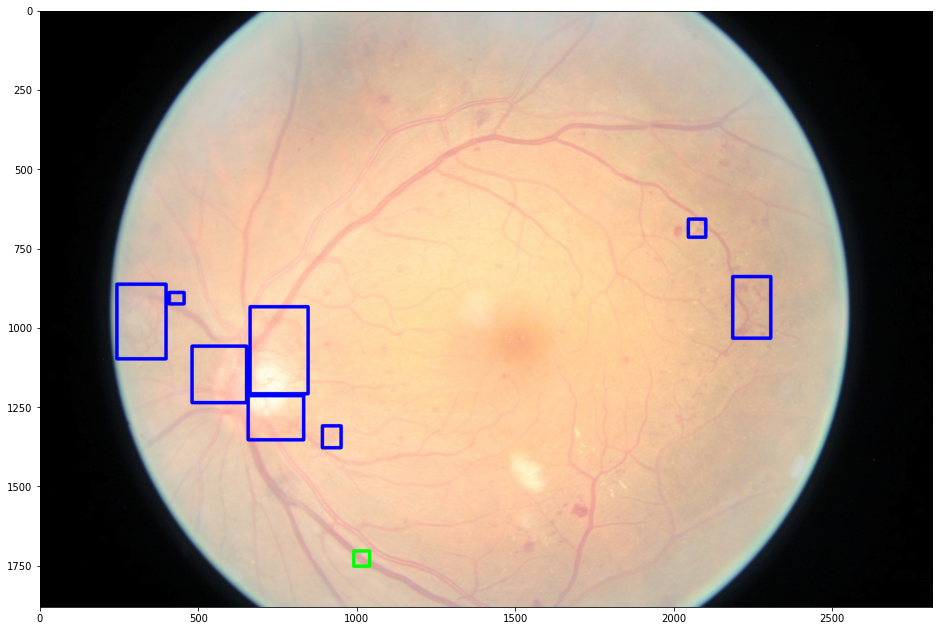

In [10]:
i = 14
I = cv2.imread(Data.iloc[i].imageFilename)
I = cv2.cvtColor(I,4)
#I = cv2.cvtColor(I, cv2.COLOR_BGR2YUV)
#I[:,:,0] = cv2.equalizeHist(I[:,:,0])
#I = cv2.cvtColor(I, cv2.COLOR_YUV2RGB)
I = np.array(I)

File_name = Data.iloc[i].imageFilename;
while(Data.iloc[i].imageFilename == File_name):
    if Data.iloc[i].Label == "AR":
        color = (0,255,0)
    else:
        color = (0,0,255)
    I = cv2.rectangle(I,
                     (Data.iloc[i].x,Data.iloc[i].y),
                     (Data.iloc[i].x + Data.iloc[i].x_width, Data.iloc[i].y + Data.iloc[i].y_width),color, 10)
    i += 1
plt.figure(figsize = (16,16))
plt.imshow(I)
plt.axis('on')

In [11]:
Data.groupby(['Label']).count()

,imageFilename,x,y,x_width,y_width
Label,,,,,
AR,411,411,411,411,411
NV,470,470,470,470,470


## Area of bounding boxes

In [12]:
Data['Area'] = Data['x_width']*Data['y_width']

### Neovessels analysis

STD =  370625.29919405456


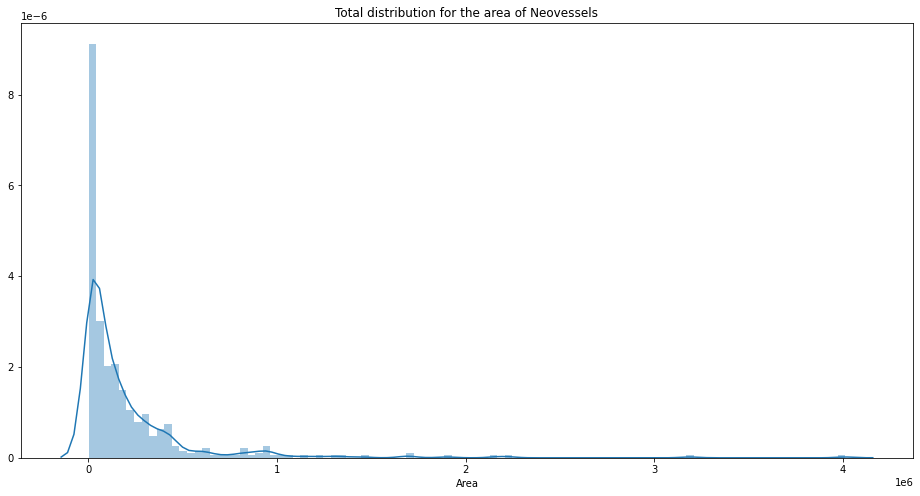

In [13]:
plt.figure(figsize=(16,8))
sns.distplot(Data[Data['Label'] == "NV"]["Area"],bins = 100)
plt.title("Total distribution for the area of Neovessels")
print("STD = ",np.std(Data[Data['Label'] == "NV"]["Area"].values))

Given the different areas we can just keep the useful areas where the area is below $0.05 \times 1e7 $

STD =  120311.61899665411


,imageFilename,x,y,x_width,y_width,Area
Label,,,,,,
NV,304,304,304,304,304,304


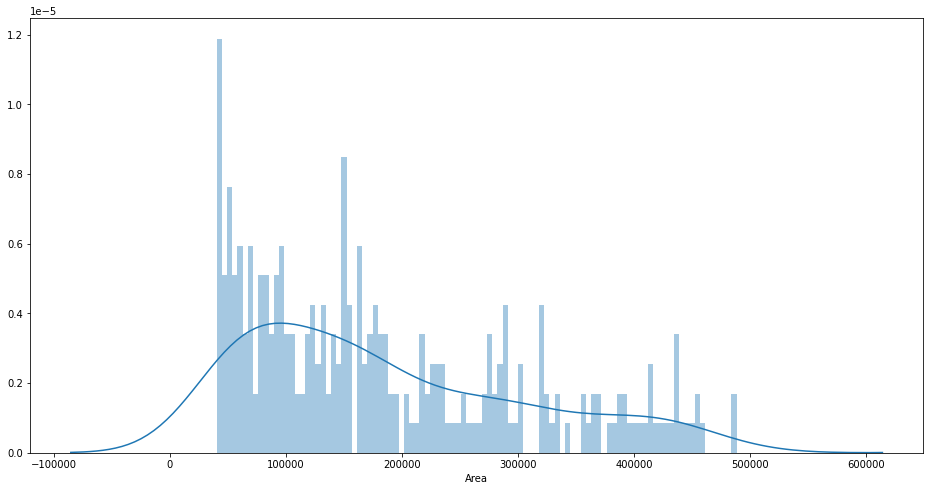

In [14]:
## Areas to keep
Data_NV = Data[Data['Label'] == "NV"].copy()
#Data_NV = Data_NV[Data_NV['Area'] < 0.05*1e7]
Data_NV = Data_NV[Data_NV['Area'] > 40000] ## Added to get rid of the smallest data
plt.figure(figsize=(16,8))
sns.distplot(Data_NV[Data_NV['Area'] < 0.05*1e7]["Area"],bins = 100)
print("STD = ",np.std(Data_NV[Data_NV['Area'] < 0.05*1e7]["Area"].values))
Data_NV.groupby(['Label']).count()

By doing this the number of images decreased from 471 to 429 with a much lower $\sigma$.
It is worth to analyze the witdh and height of the patches from the image by computing the mean of both measurements and thus defining the shape of the network to use

In [15]:
print("x_width Mean = ",np.mean(Data_NV['x_width'].values))
print("x_width Mean = ",np.mean(Data_NV['y_width'].values))

x_width Mean =  494.04276315789474
x_width Mean =  502.1578947368421


Given this analysis we can propose a network of an input shape of (312,312,3)

### Arrosariamiento analysis

STD =  20081.890329476148


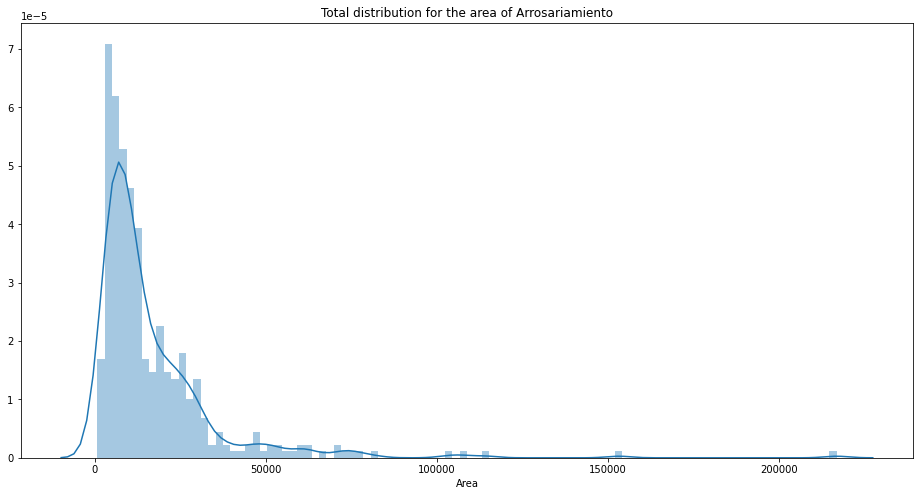

In [16]:
plt.figure(figsize=(16,8))
sns.distplot(Data[Data['Label'] == "AR"]["Area"],bins = 100)
plt.title("Total distribution for the area of Arrosariamiento")
print("STD = ",np.std(Data[Data['Label'] == "AR"]["Area"].values))

Given the different areas we can just keep the useful areas where the area is below $100 000$

STD =  14133.934987419996


,imageFilename,x,y,x_width,y_width,Area
Label,,,,,,
AR,406,406,406,406,406,406


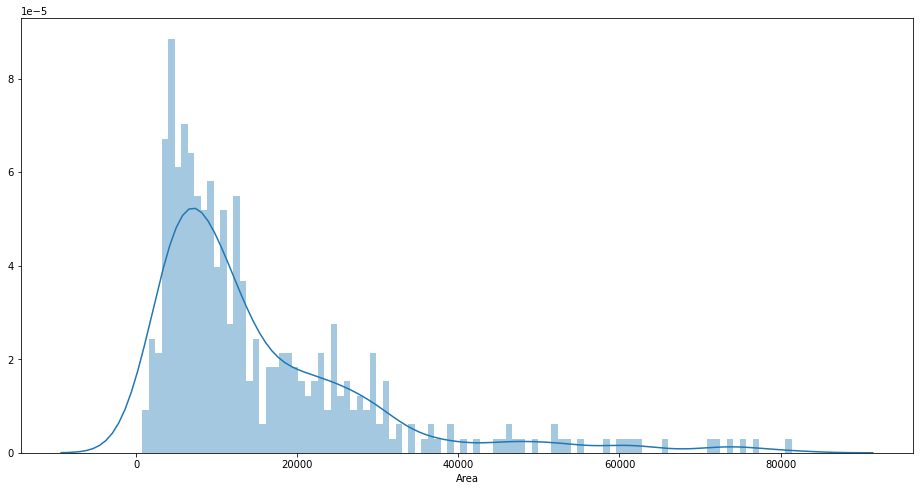

In [17]:
## Areas to keep
Data_AR = Data[Data['Label'] == "AR"].copy()
Data_AR = Data_AR[Data_AR['Area'] < 100000]
plt.figure(figsize=(16,8))
sns.distplot(Data_AR["Area"],bins = 100)
print("STD = ",np.std(Data_AR["Area"].values))
Data_AR.groupby(['Label']).count()

By doing this the number of images decreased from 413 to 406 with a much lower $\sigma$ 
It is worth to analyze the witdh and height of the patches from the image by computing the mean of both measurements and thus defining the shape of the network to use

In [18]:
print("x_width Mean = ",np.mean(Data_AR['x_width'].values))
print("x_width Mean = ",np.mean(Data_AR['y_width'].values))

x_width Mean =  126.27832512315271
x_width Mean =  111.12068965517241


Given this analysis we can propose a network of an input shape of (128,128,3)

# NEOVESSELS VISUALIZATION

In [19]:
Data_NV = Data_NV.reset_index().drop(["index"],axis=1)

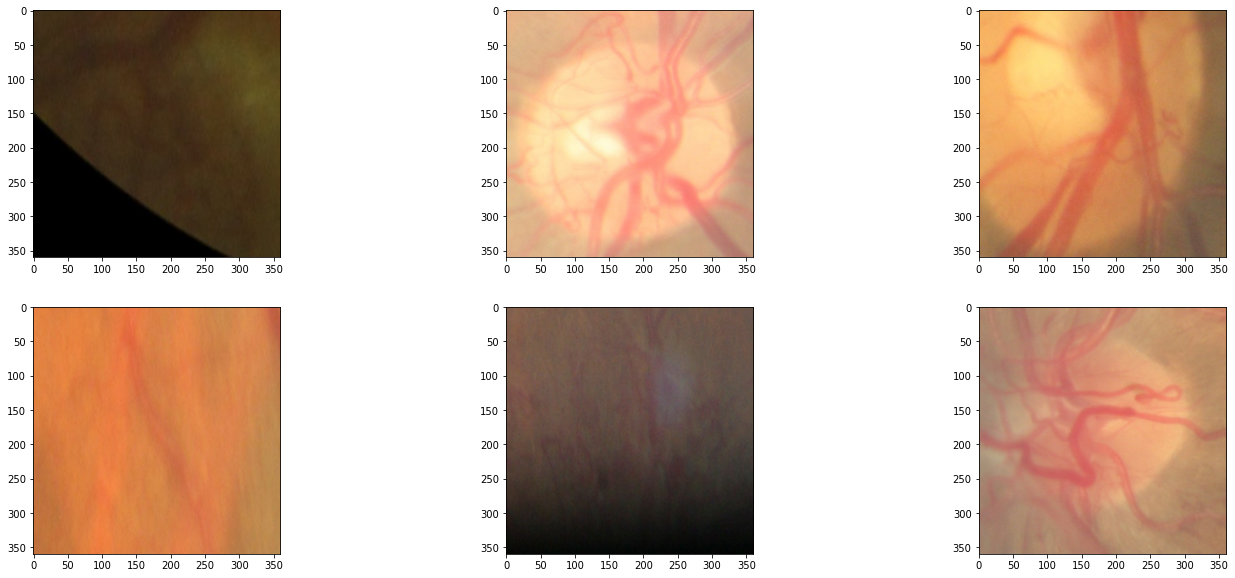

In [20]:
nr,ncol = (2,3)
fig,axs = plt.subplots(nr,ncol,figsize = (ncol*8,nr*5))
indx_rand = np.random.randint(0,len(Data_NV),nr*ncol)
k = 0
for i in range(1,nr+1):
    for j in range(1,ncol+1):
        ## Read the image
        I = cv2.imread(Data_NV.iloc[indx_rand[k]]['imageFilename'])
        # Coordinates for the patch
        x = int(Data_NV.iloc[indx_rand[k]]['x'])
        y = int(Data_NV.iloc[indx_rand[k]]['y'])
        x_width = int(Data_NV.iloc[indx_rand[k]]['x_width'])
        y_width = int(Data_NV.iloc[indx_rand[k]]['y_width'])
        #I = cv2.cvtColor(I, cv2.COLOR_BGR2YUV)
        #I[:,:,0] = cv2.equalizeHist(I[:,:,0])
        #I = cv2.cvtColor(I, cv2.COLOR_YUV2RGB)
        I = cv2.cvtColor(I, 4)
        #I = I[:,:,1]
        ## Extract patch
        I = I[y:y+y_width,x:x+x_width]
        #print(I.shape)
        I = cv2.resize(I,(360,360),interpolation = cv2.INTER_LANCZOS4)
        axs[i-1][j-1].imshow(I)
        k += 1

By this point we identified the regions in our dataset with the presence of neovessels, we will try to create a binary classification

**Classes**:
 * NEOVESSELS
 * HEALTHY

### Data into memory
For the data we will create a ground truth of the image (Black and white). Extract all the neovessels from that image as a patch, then extract the patch and resize it to the target size. Use the ground truth to find a box that has no neovessels.

In [21]:
from Segmentation_OPTOS.Tools.Annotations.Reformat import csv2xml

In [22]:
Data_NV['x1'] = Data_NV['x']
Data_NV['y1'] = Data_NV['y']
Data_NV['x2'] = Data_NV['x'] + Data_NV['x_width']
Data_NV['y2'] = Data_NV['y'] + Data_NV['y_width']
Data_NV['class'] = Data_NV['Label']
Data_NV['Filename'] = Data_NV['imageFilename']
Data_NV.head()

,imageFilename,Label,x,y,x_width,y_width,Area,x1,y1,x2,y2,class,Filename
0,/content/automl/efficientdet/Parte 1 (PDR)/16_...,NV,2196,1132,583,1092,636636,2196,1132,2779,2224,NV,/content/automl/efficientdet/Parte 1 (PDR)/16_...
1,/content/automl/efficientdet/Parte 1 (PDR)/16_...,NV,1143,1266,480,377,180960,1143,1266,1623,1643,NV,/content/automl/efficientdet/Parte 1 (PDR)/16_...
2,/content/automl/efficientdet/Parte 1 (PDR)/326...,NV,662,934,183,274,50142,662,934,845,1208,NV,/content/automl/efficientdet/Parte 1 (PDR)/326...
3,/content/automl/efficientdet/Parte 1 (PDR)/326...,NV,1960,1071,314,258,81012,1960,1071,2274,1329,NV,/content/automl/efficientdet/Parte 1 (PDR)/326...
4,/content/automl/efficientdet/Parte 1 (PDR)/986...,NV,399,700,138,359,49542,399,700,537,1059,NV,/content/automl/efficientdet/Parte 1 (PDR)/986...


In [23]:
import cv2
from lxml.etree import Element, SubElement, tostring
import pandas as pd
import os
import json
from shutil import copyfile
from sklearn.model_selection import train_test_split


def csv2xml(data: pd.DataFrame):
    """
    csv2xml iterates over a dataframe to create VOC annotations from a csv with the following format

    ############################################### \\
    ## Filename %% x1 %% y1 %% x2 %% y2 %% class ## \\
    ############################################### \\

    :param data: Dataframe containing the data
    :param PathToAppend: Path to append to the path
    :return:
    """
    os.mkdir("./VOCdevkit")
    os.mkdir("./VOCdevkit/VOC2012")
    os.mkdir("./VOCdevkit/VOC2012/Annotations")
    os.mkdir("./VOCdevkit/VOC2012/ImageSets")
    os.mkdir("./VOCdevkit/VOC2012/ImageSets/Main")
    os.mkdir("./VOCdevkit/VOC2012/JPEGImages")
    Files = set(data['Filename'])  ## Extract unique Filenames
    Files = [x for x in Files]  ## Convert it to a list to iterate

    Classes = set(data['class'])
    Classes = [Class for Class in Classes]
    ImageSet = {}
    for Class in Classes:
      ImageSet[Class] = []

    for Image in Files:  ## For every Image (DataFrame) there are several bounding boxes
        path = os.path.split(Image)

        node_root = Element('annotation')  ## Base node
        node_folder = SubElement(node_root, 'folder')  ## Folder node
        node_folder.text = "VOC2012"
        node_filename = SubElement(node_root, 'filename')  ## Filename node
        node_filename.text = path[-1]
        node_source = SubElement(node_root, 'source')  ## Source node
        node_sourceDatabase = SubElement(node_source, 'database')  ## Source database
        node_sourceDatabase.text = "Neovessels OPTOS"
        node_sourceAnnotation = SubElement(node_source, 'annotation')  ## Source annotation
        node_sourceAnnotation.text = "PASCAL VOC2012"
        node_sourceImage = SubElement(node_source, 'image')  ## Source image
        node_sourceImage.text = "APEC"

        ## Load image and check for size
        I = cv2.imread(Image)
        [M, N, C] = I.shape
        # Move the image to ImageSets
        copyfile(Image, os.path.join("./VOCdevkit/VOC2012/JPEGImages", path[-1]))

        node_size = SubElement(node_root, 'size')

        node_sizeWidth = SubElement(node_size, 'width')
        node_sizeWidth.text = str(N)
        node_sizeHeight = SubElement(node_size, 'height')
        node_sizeHeight.text = str(M)
        node_sizeDepth = SubElement(node_size, 'depth')
        node_sizeDepth.text = str(C)

        node_segmented = SubElement(node_root, 'segmented')
        node_segmented.text = "0"

        for i, bb in data[data['Filename'] == Image].iterrows():  ## Every Image has one or more bounding boxes
            node_object = SubElement(node_root, 'object')
            node_Oname = SubElement(node_object, 'name')
            node_Opose = SubElement(node_object, 'pose')
            node_Otruncated = SubElement(node_object, 'truncated')
            node_Odifficult = SubElement(node_object, 'difficult')

            ## Append to file for txt
            ImageSet[bb['class']].append(path[-1]) ## We append the name of the image given a class

            node_Oname.text = bb['class']
            node_Opose.text = "Unspecified"
            node_Otruncated.text = "0"
            node_Odifficult.text = "0"

            node_Obndbox = SubElement(node_object, 'bndbox')
            node_OBB_xmin = SubElement(node_Obndbox, 'xmin')
            node_OBB_xmin.text = str(bb.x1)
            node_OBB_ymin = SubElement(node_Obndbox, 'ymin')
            node_OBB_ymin.text = str(bb.y1)
            node_OBB_xmax = SubElement(node_Obndbox, 'xmax')
            node_OBB_xmax.text = str(bb.x2)
            node_OBB_ymax = SubElement(node_Obndbox, 'ymax')
            node_OBB_ymax.text = str(bb.y2)

        ## Final node
        s = tostring(node_root, pretty_print=True)
        name = path[-1].split('.')[0]
        with open(os.path.join("./VOCdevkit/VOC2012/Annotations", name + ".xml"), 'wb') as f:
            f.write(s)

    #Indexes for train,trainval and val
    train = []
    trainval = []
    val = []

    ## Split data for each class
    for Class in Classes:
        names = set(ImageSet[Class])
        names = [n for n in names]
        X_train, X_test = train_test_split(names, test_size=0.2)
        X_train = [X.split('.')[0] for X in X_train]
        X_test = [X.split('.')[0] for X in X_test]
        with open(f"./VOCdevkit/VOC2012/ImageSets/Main/{Class}_train.txt","x") as f:
            for item in X_train:
                f.write("%s\n" % item)
        with open(f"./VOCdevkit/VOC2012/ImageSets/Main/{Class}_trainval.txt", "x") as f:
            for item in X_test:
                f.write("%s\n" % item)
        with open(f"./VOCdevkit/VOC2012/ImageSets/Main/{Class}_val.txt", "x") as f:
            for item in X_test:
                f.write("%s\n" % item)

        train = train + X_train
        trainval = trainval + X_test
        val = val + X_test
    # Write train, trainval and val txt
    with open(f"./VOCdevkit/VOC2012/ImageSets/Main/train.txt","x") as f:
        for item in train:
                f.write("%s\n" % item)
    with open(f"./VOCdevkit/VOC2012/ImageSets/Main/trainval.txt", "x") as f:
        for item in trainval:
                f.write("%s\n" % item)
    with open(f"./VOCdevkit/VOC2012/ImageSets/Main/val.txt", "x") as f:
        for item in val:
                f.write("%s\n" % item)

    ## Create label_map_json_path manually

In [24]:
!rm -r VOCdevkit/
csv2xml(Data_NV)

rm: cannot remove 'VOCdevkit/': No such file or directory


## Convert data to tf record

In [25]:
!mkdir tfrecord
!PYTHONPATH=".:$PYTHONPATH"  python dataset/create_pascal_tfrecord.py  \
    --data_dir=VOCdevkit --year=VOC2012  --output_path=tfrecord/pascal \
    --label_map_json_path="./label_map_json_path.json"

2020-09-29 07:48:28.725971: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
I0929 07:48:30.604452 139767345588096 create_pascal_tfrecord.py:257] Writing to output directory: tfrecord
I0929 07:48:30.611198 139767345588096 create_pascal_tfrecord.py:288] Reading from PASCAL VOC2012 dataset.
I0929 07:48:30.611402 139767345588096 create_pascal_tfrecord.py:293] On image 0 of 168
/content/automl/efficientdet/dataset/tfrecord_util.py:74: FutureWarning: The behavior of this method will change in future versions. Use specific 'len(elem)' or 'elem is not None' test instead.
  if not xml:
I0929 07:48:31.529529 139767345588096 create_pascal_tfrecord.py:293] On image 100 of 168


In [26]:
!wget https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco/efficientdet-d7.tar.gz
!tar xf efficientdet-d7.tar.gz

--2020-09-29 07:48:32--  https://storage.googleapis.com/cloud-tpu-checkpoints/efficientdet/coco/efficientdet-d7.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 108.177.15.128, 173.194.76.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 413468440 (394M) [application/x-tar]
Saving to: ‘efficientdet-d7.tar.gz.1’

efficientdet-d7.tar 100%[===================>] 394.31M  70.3MB/s    in 5.6s    

2020-09-29 07:48:39 (70.3 MB/s) - ‘efficientdet-d7.tar.gz.1’ saved [413468440/413468440]



In [ ]:
!python main.py --mode=train_and_eval \
    --training_file_pattern=tfrecord/pascal*.tfrecord \
    --validation_file_pattern=tfrecord/pascal*.tfrecord \
    --model_name=efficientdet-d7 \
    --model_dir=/tmp/efficientdet-d7-finetune  \
    --ckpt=efficientdet-d7  \
    --train_batch_size=8 \
    --eval_batch_size=8 --eval_samples=30 \
    --num_examples_per_epoch=5717 --num_epochs=1500  \
    --hparams=voc_config.yaml

2020-09-29 07:52:42.346139: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
I0929 07:52:44.658999 140676547135360 main.py:227] {'name': 'efficientdet-d7', 'act_type': 'swish', 'image_size': (1536, 1536), 'target_size': None, 'input_rand_hflip': True, 'jitter_min': 0.1, 'jitter_max': 2.0, 'autoaugment_policy': None, 'use_augmix': False, 'augmix_params': [3, -1, 1], 'sample_image': None, 'num_classes': 2, 'seg_num_classes': 3, 'heads': ['object_detection'], 'skip_crowd_during_training': True, 'label_map': {1: 'NV'}, 'max_instances_per_image': 100, 'regenerate_source_id': False, 'min_level': 3, 'max_level': 7, 'num_scales': 3, 'aspect_ratios': [1.0, 2.0, 0.5], 'anchor_scale': 5.0, 'is_training_bn': True, 'momentum': 0.9, 'optimizer': 'sgd', 'learning_rate': 0.08, 'lr_warmup_init': 0.008, 'lr_warmup_epoch': 1.0, 'first_lr_drop_epoch': 200.0, 'second_lr_drop_epoch': 250.0, 'poly_lr_power': 0.9, 'clip_gradients_norm': 10.0